In [1]:
import sys
sys.path.append('../modules')
import image_segmentation as imseg
import volume_estimation as ve
import cv2
import matplotlib.pyplot as plt
from numpy import unique
import pandas as pd

/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
CUDA available: True
CUDA device count: 1
CUDA current device: NVIDIA GeForce RTX 4070 Ti SUPER


In [4]:
img_path = "../media/kotlet01.jpg"
table_path = "../tabela_kalorycznosci.csv"
df = pd.read_csv("../tabela_kalorycznosci.csv")
classes = df['nazwa'].to_list()
classes.insert(0,'tło')
print("Pierwsze 5 kals żywności:")
print(classes[0:5])

Pierwsze 5 kals żywności:
['tło', 'wieprzowina', 'ziemniak', 'pudding', 'dynia']


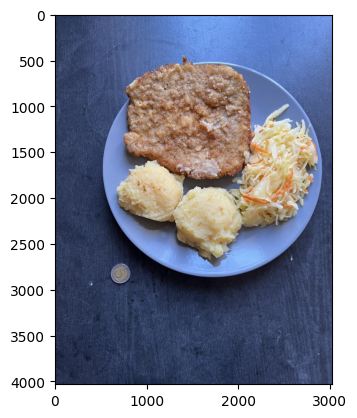

In [5]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
pred_mask = imseg.get_pred_mask(img)

/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /home/mich/Projects/food_calorie_estimation/tests/../modules/../models/segmentation/iter_160000.pth


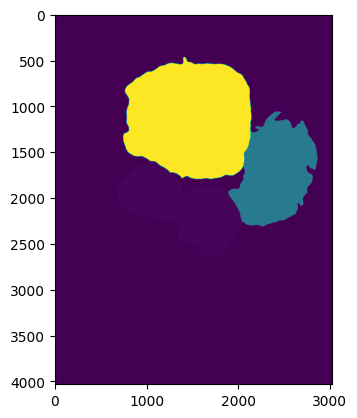

In [7]:
plt.imshow(pred_mask)

In [8]:
n_of_pixels = 4032 * 3024
uniq, counts = unique(pred_mask, return_counts=True)
print("Procent powierzchni zajmowanej przez każdą z potraw")
print(f"Wartości <1% będą pomijane\n")
for (u,c) in zip(uniq, (counts/n_of_pixels)*100):
    print(f"{classes[u]}: {c:.2f}%")

Procent powierzchni zajmowanej przez każdą z potraw
Wartości <1% będą pomijane

tło: 75.47%
ziemniak: 6.09%
kapusta: 6.35%
schabowy: 12.10%


In [10]:

fx = 3080.56
fy = 3080.80
cx = 1543.23
cy = 1982.34
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
volumes, meal_ids = ve.predict_volume(img, pred_mask,fx,fy,cx,cy, visualize=False)
print(volumes)

Using cache found in /home/mich/.cache/torch/hub/yvanyin_metric3d_main


Znaleziono monetę. Współczynnik skali = 17.61893868190914
Rozpoznano: [2, 43, 104]
Obliczono objętość dla id=2
Obliczono objętość dla id=43
Obliczono objętość dla id=104
[212.5807047610671, 310.229975088891, 259.1755801374944]


In [11]:

sum = df.iloc[0, 3:] * 0
for volume, id in zip(volumes, meal_ids):
    weight = volume * df.iloc[id-1, 2] / 100
    print(f"{df.iloc[id-1, 1]} - {weight*100:.2f} g")
    print(df.iloc[id-1, 3:] * weight)
    sum += df.iloc[id-1, 3:] * weight
    print("")

print("Łącznie:")
print(sum)

ziemniak - 233.84 g
Kalorie (kcal/100g)    180.055857
Tłuszcz                  0.233839
Węglowodany             40.921786
w tym cukry               1.87071
Białko                   4.676776
Sól                      0.233839
Name: 1, dtype: object

kapusta - 263.70 g
Kalorie (kcal/100g)    39.554322
Tłuszcz                 0.263695
Węglowodany             6.328691
w tym cukry                  0.0
Białko                  2.373259
Sól                     1.743027
Name: 42, dtype: object

schabowy - 285.09 g
Kalorie (kcal/100g)    1000.676915
Tłuszcz                  68.707446
Węglowodany              45.329809
w tym cukry                    0.0
Białko                   54.167696
Sól                            0.0
Name: 103, dtype: object

Łącznie:
Kalorie (kcal/100g)    1220.287094
Tłuszcz                  69.204981
Węglowodany              92.580286
w tym cukry                1.87071
Białko                   61.217731
Sól                       1.976866
Name: 0, dtype: object
